In [1]:
import numpy as np

**Ejercicio**: Se tiene una muestra $x_1, \dots , x_n$. En base a la distribución empírica de dicha muestra, se genera una nueva muestra de seis elementos $x^*_1,\dots, x^*_6$. 

Hacer una función que reciba la muestra original y calcule cuántas muestras diferentes $x^*_1,\dots, x^*_6$ puede haber, sin importar el orden de los elemenos *(no hace falta usar una fórmula combinatoria)*.

In [2]:
def UniqueResamples(sample):
    '''
    Recibe:
       sample, un array con la muestra original [x_1, ..., x_n]
    Retorna:
       La cantidad de muestras de longitud 6 [x*_1, ..., x*_6] distintas que se pueden obtener, si no nos importa el orden
    PARA PENSAR:
       Generalizar esta función para que retorne la cantidad de muestras distintas de longitud n (tomar n como parámetro)
    '''
    numbers      = np.array(np.unique(sample, axis=0))                                              # Solo queremos los números distintos (opcional)
    permutations = np.array(np.meshgrid(sample,sample,sample,sample,sample,sample)).T.reshape(-1,6) # Esto da todas las posibles permutaciones
    n, _         = np.shape(permutations)                                                                 

    for i in range(n):
        permutations[i,:] = np.sort(permutations[i,:])  # Ordenamos cada permutación, así todas las que son anagramas entre sí pasan a verse igual

    return(len(np.unique(permutations, axis=0)))        # Contamos cuántas distintas quedan 

In [ ]:
muestra = np.array([2,1,1,4,6,3])    # Esta es la muestra del ejercicio 7 de la guía 10
UniqueResamples(muestra)   

**Ejercicio**: Hacer una fución que reciba la probabilidad puntual conjunta de dos variables discretas $X$ e $Y$, una función $g:\mathbb{R}^2\to \mathbb{R}$ y calcule $\mathbb{E}(g(X,Y))$. Recordar que 
$$\mathbb{E}(g(X,Y))= \sum_{x\in Im(X)}\sum_{y\in Im(Y)}g(x,y)\mathbb{P}(X=x, Y=y).$$

In [4]:
def EVg(jpmf, g):
    '''
    Recibe:
       jpmf, un diccionario con la función de probabilidad puntual conjunta (joint probability mass function)
       jpmf[(a,b)] = P(X = a, Y = b) 
       g, una función de dos variables
    Retorna:
       La esperanza de G(X,Y) 
    PARA PENSAR:
       Generalizar esta función para que funcione con una cantidad aribitraria de variables (sin agregar parámetros)
    PARA MEDITAR:
       Qué deberíamos hacer si las variables fueran continuas?
    '''
    e = 0
    for (a,b) in jpmf:                 # Recorremos las claves del diccionario (osea, los valores en la imagen conjunta)
        e = e + (g(a,b)) * jpmf[(a,b)] 
    return e

In [ ]:
conjunta = {(0,1): 2/27, (0,2): 1/3,  (0,4): 1/27,
            (1,1): 1/27, (1,2): 1/3,  (1,4): 2/27,
            (2,1): 1/72, (2,2): 1/12, (2,4): 1/72} # Esta es la conjunta del ejercico de la clase de problemas del viernes 12 de Mayo

def g(x,y):
    return x**2*y

EVg(conjunta, g)                                   # Chequeamos que efectivamente da 35/18

**Ejercicio BONUS**: Usar la función del ejercicio anterior para calcular: 
*   Acumulada de $X+Y$
*   Varianza de $X$



In [ ]:
# Ahora les toca a ustedes resolver este

**Ejercicio**: Para cada $N\in \{30,45,\ldots, 210\}$ generar $N$ realizaciones de variables aleatorias independientes con distribución de Normal de parámetros $\mu = 5$, $\sigma^2=16$. 

Para cada valor de $N$ considerar los datos generados y calcular un intervalo de confianza del $95\%$ para $\mu$ asumuendo $\sigma$ conocida. Indicar cuáles de los intervalos contienen a $\mu$.

Recordar que el intervalo de confianza a nivel $95\%$ es:
$$\left(-z_{0.025}\frac{\sigma}{\sqrt{N}}+\bar{X},\, z_{0.025}\frac{\sigma}{\sqrt{N}}+\bar{X}\right).$$

In [6]:
from matplotlib import pyplot as plt
import scipy.stats as sps

In [7]:
# Definimos variables
mu    = 5                        # Mu
sigma = 4                        # Sigma
a     = 0.05                     # Alpha
N     = np.arange(30, 211, 15)   # Valores posibles de N
sup   = np.zeros(len(N))         # Acá vamos a guardar el extemo superior del intervalo para cada N
inf   = np.zeros(len(N))         # Acá vamos a guardar el extemo inferior del intervalo para cada N

# Para encontrar los percentiles sin usar la tabla (opcional)
norm = sps.norm(loc=0, scale=1) 

In [8]:
# Simulaciones
for i in range(len(N)):
    sample = np.random.normal(loc=mu, scale=sigma, size=N[i])
    m      = np.mean(sample)         # Media
    s      = np.std(sample, ddof=1)  # Desvio estándar (ATENCIÓN: asegurarse que el denominador sea n - 1)
    sup[i] = norm.ppf(1-a/2) * s / np.sqrt(N[i]) + m
    inf[i] = norm.ppf(a/2) * s / np.sqrt(N[i]) + m   

In [ ]:
# Intervalos en función de N
plt.title(r'Intervalos de confianza para $\mu$', fontsize = 20)
plt.ylabel(r'$(a,b)$', fontsize = 15)
plt.xlabel(r'$N$',fontsize = 15)
plt.axhline(y=mu, color='grey')         # Graficamos el valor de mu como referencia

for i in range(len(N)):
    plt.plot((N[i], N[i]), (inf[i], sup[i]), 'g-' if (mu >= inf[i] and mu <= sup[i]) else 'r-') 
    # El intervalo lo pintamos verde si contiene a mu, rojo en caso contrario

plt.show()

**Ejercicio**: Sean $X_1, \dots, X_6$ variables aleatorias i.i.d con distribución $\mathcal{E}(5)$. Generar $10000$ realizaciondes independientes de la variable aleatoria $Y$, donde $Y=X_1+\cdots+X_6$. 

Realizar un histograma de frecuencias relativas con ancho de banda $0.1$ de las primeras $200$ realizaciones. 

Comparar el histograma de probabilidad con ancho de banda $0.05$ con la función de densidad de una variable con distribución $\Gamma(6,5)$.

Recordar que si $X\sim\Gamma(\alpha,\lambda)$ su función de densidad viene dada por
$$f(x)= \frac{\lambda^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\lambda x}.$$

In [10]:
from scipy.special import gamma

In [11]:
# Densidad de una Gamma
def pdfGamma(a, l, x):
    return (l ** a) * (x ** (a - 1)) * np.exp(-l * x) / gamma(a) # Dedicí implementarlo, pero podría llamar a scipy.stats.gamma.pdf(x, a, scale=1/l) 

In [12]:
N     = 10000 # Cantidad de realizaciones
alpha = 6     # Alpha
lam   = 5     # Lambda

sample = np.sum(np.random.exponential(scale=1/lam, size=(alpha,N)), axis=0) # (ATENCION: no toma lambda de parámetro, sino la esperanza)

In [ ]:
# Histograma de frecuencias relativas
bw           = 0.1             # Ancho de banda
small_sample = sample[0:200]   # Nos quedamos con primeras 200 realicaciones 

plt.xlabel(r'$Y$', fontsize = 15)
plt.ylabel(r'Frecuencia relativa', fontsize = 15)
plt.hist(small_sample, bins=np.arange(min(small_sample), max(small_sample) + bw, bw), weights=np.zeros(len(small_sample)) + 1. / len(small_sample))  
# Doy el peso de cada elemento para asegurarme que el histograma sea de frecuencia relativa (atención: no se hace por default)

plt.show()

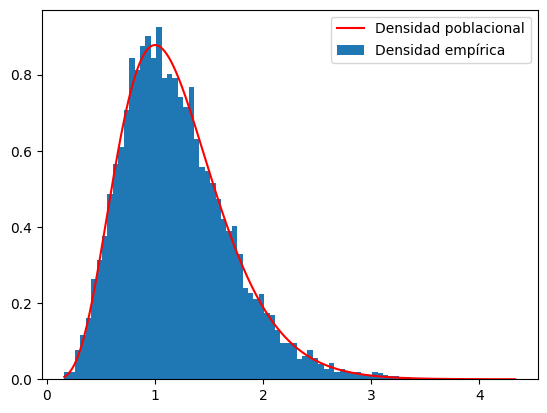

In [16]:
# Histograma de probabilidad
bw = 0.05                                                                                     # Ancho de banda
t  = np.linspace(min(sample), max(sample) + bw, int((max(sample) + bw - min(sample)) / 0.01)) # Discretizamos la recta para graficar la densidad

plt.plot(t, pdfGamma(alpha, lam, t), color='red', label='Densidad poblacional')   
plt.hist(sample, bins=np.arange(min(sample), max(sample) + bw, bw), density=True, label='Densidad empírica')  

plt.legend()
plt.show()